# Comparison of custom implementation of SGD for Linear Regression with Scikit Learn’s SGDRegressor

To implement SGD linear regression on Boston house prices data set manually and compare it with the inbuilt SGDRegressor in Scikit learn

## Objective

1. Implement Linear regression with Scikit learn's SGDRegressor
2. Implement SGD for Linear regression without using inbuilt function in scikit learn
3. Compare means square error in both cases

In [66]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

## Boston Dataset Features

In [67]:
X = load_boston().data

In [68]:
# Shape of Boston datasets
print(X.shape)

(506, 13)


In [69]:
#gives dataset characteristics
print(load_boston().DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [70]:
#output value
Y = load_boston().target


In [71]:
#Splitting whole data set into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [72]:
#printing shapes of train and test data
print("X Shape: ",X.shape)
print("Y Shape: ",Y.shape)
print("X_Train Shape: ",x_train.shape)
print("X_Test Shape: ",x_test.shape)
print("Y_Train Shape: ",y_train.shape)
print("Y_Test Shape: ",y_test.shape)

X Shape:  (506, 13)
Y Shape:  (506,)
X_Train Shape:  (354, 13)
X_Test Shape:  (152, 13)
Y_Train Shape:  (354,)
Y_Test Shape:  (152,)


In [73]:

scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [74]:
#merging x and y to one data set called train_data
train_data=pd.DataFrame(x_train)
train_data['price']=y_train
print(pd.DataFrame(x_train).head(3))
print(pd.DataFrame(y_train).head(3))
print(train_data.head(3))

         0         1         2         3         4         5         6   \
0  0.085886 -0.477242  0.995476 -0.275659  1.923968  0.166720  0.663413   
1 -0.383828 -0.477242 -1.039675 -0.275659 -0.378424 -0.587813 -0.004822   
2  4.995813 -0.477242  0.995476 -0.275659  0.391992 -0.730600  1.078896   

         7         8         9         10        11        12  
0 -0.592797  1.726532  1.577535  0.806651  0.179349 -0.700575  
1 -0.504341 -0.489623 -0.641811 -0.869794  0.389933 -0.437370  
2 -1.124978  1.726532  1.577535  0.806651 -4.016093 -0.370501  
      0
0  25.0
1  22.6
2  15.0
          0         1         2         3         4         5         6  \
0  0.085886 -0.477242  0.995476 -0.275659  1.923968  0.166720  0.663413   
1 -0.383828 -0.477242 -1.039675 -0.275659 -0.378424 -0.587813 -0.004822   
2  4.995813 -0.477242  0.995476 -0.275659  0.391992 -0.730600  1.078896   

          7         8         9        10        11        12  price  
0 -0.592797  1.726532  1.577535  0.8066

In [75]:
x_test=np.array(x_test)
y_test=np.array(y_test)

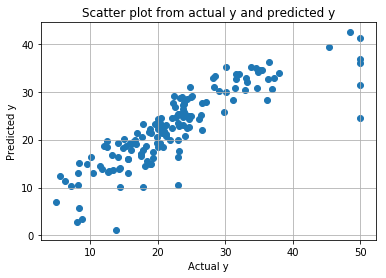

Mean Squared Error : 22.97587834267366


In [76]:
# Inbuilt function in scikit learn for SGD
n_iter=1000
clf_ = SGDRegressor(max_iter=n_iter)
clf_.fit(x_train, y_train)
y_pred_sksgd=clf_.predict(x_test)
plt.scatter(y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Squared Error :',mean_squared_error(y_test, y_pred_sksgd))

In [77]:
#function used to custom sgd regression
#code 
#https://medium.com/@nikhilparmar9/simple-sgd-implementation-in-python-for-linear-regression-on-boston-housing-data-f63fcaaecfb1

def MyCustomSGD(train_data,learning_rate,n_iter,k,divideby):
    
    # Initially we will keep our W and B as 0 as per the Training Data
    w=np.zeros(shape=(1,train_data.shape[1]-1))
    b=0
    
    cur_iter=1
    while(cur_iter<=n_iter): 

        # We will create a small training data set of size K
        temp=train_data.sample(k)
        
        # We create our X and Y from the above temp dataset
        y=np.array(temp['price'])
        x=np.array(temp.drop('price',axis=1))
        
        # We keep our initial gradients as 0
        w_gradient=np.zeros(shape=(1,train_data.shape[1]-1))
        b_gradient=0
        
        for i in range(k): # Calculating gradients for point in our K sized dataset
            prediction=np.dot(w,x[i])+b
            w_gradient=w_gradient+(-2)*x[i]*(y[i]-(prediction))
            b_gradient=b_gradient+(-2)*(y[i]-(prediction))
        
        #Updating the weights(W) and Bias(b) with the above calculated Gradients
        w=w-learning_rate*(w_gradient/k)
        b=b-learning_rate*(b_gradient/k)
        
        # Incrementing the iteration value
        cur_iter=cur_iter+1
        
        #Dividing the learning rate by the specified value
        learning_rate=learning_rate/divideby
        
    return w,b #Returning the weights and Bias

In [78]:
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

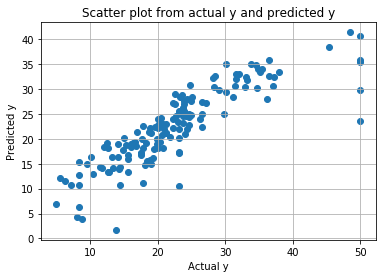

Mean Squared Error : 23.08177336957313


In [79]:
#Predicting values using custom sgd

w,b=MyCustomSGD(train_data,learning_rate=.01,n_iter=1000,divideby=1,k=10)
y_pred_customsgd_improved=predict(x_test,w,b)

plt.scatter(y_test,y_pred_customsgd_improved)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd_improved))

# Conclusion

1. Custom SGD for linear regression worked well like inbuilt SGD for learning rate =.01 and interation 1000 .Also best is achieved after dividing learning rate by 1 in each iteration
2. Performance of custom SGD is poor for learning rates,iteration more less than the specified value listed above